In [2]:
import os
import numpy as np
import pandas as pd
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
BASE_PATH = "C:\\Users\\acer\\Downloads\\archive\\Rice_Image_Dataset"
CSV_PATH = os.path.join(BASE_PATH, "C:\\Users\\acer\\Downloads\\archive\\Rice_Image_Dataset\\Rice_df.csv")
MODEL_PATH = os.path.join(BASE_PATH, "C:\\Users\\acer\\Downloads\\archive\\Rice_Image_Dataset\\model_cnn.keras")
CONF_MATRIX_PATH = os.path.join(BASE_PATH, "C:\\Users\\acer\\Downloads\\archive\\Rice_Image_Dataset\\confusion_matrix.csv")

In [5]:
image_paths = list(Path(BASE_PATH).rglob("*.jpg"))
image_names = [p.parent.stem for p in image_paths]
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(image_names)


In [6]:
df = pd.DataFrame({
    "link": [str(p) for p in image_paths],
    "name": image_names,
    "label": encoded_labels
})
df.to_csv(CSV_PATH, index=False)

In [7]:
df

,link,name,label
0,C:\Users\acer\Downloads\archive\Rice_Image_Dat...,Arborio,0
1,C:\Users\acer\Downloads\archive\Rice_Image_Dat...,Arborio,0
2,C:\Users\acer\Downloads\archive\Rice_Image_Dat...,Arborio,0
3,C:\Users\acer\Downloads\archive\Rice_Image_Dat...,Arborio,0
4,C:\Users\acer\Downloads\archive\Rice_Image_Dat...,Arborio,0
...,...,...,...
74995,C:\Users\acer\Downloads\archive\Rice_Image_Dat...,Karacadag,4
74996,C:\Users\acer\Downloads\archive\Rice_Image_Dat...,Karacadag,4
74997,C:\Users\acer\Downloads\archive\Rice_Image_Dat...,Karacadag,4
74998,C:\Users\acer\Downloads\archive\Rice_Image_Dat...,Karacadag,4


C:\Users\acer\AppData\Local\Temp\ipykernel_11636\3563512785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="name", palette="Set2")


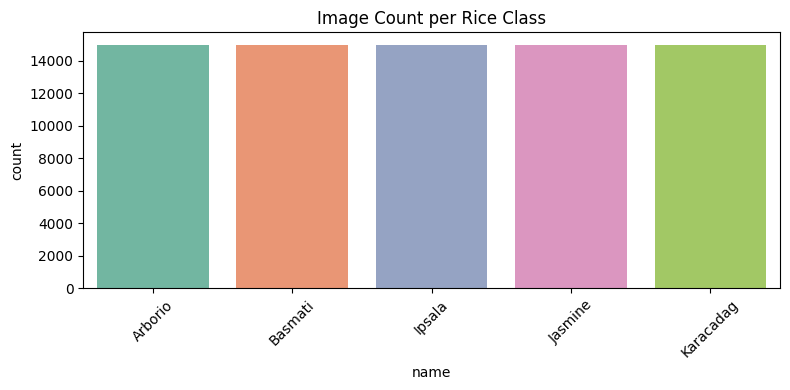

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="name", palette="Set2")
plt.xticks(rotation=45)
plt.title("Image Count per Rice Class")
plt.tight_layout()
plt.show()

In [9]:
model = Sequential([
    Conv2D(15, (3, 3), activation="relu", input_shape=(100, 100, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(30, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(100, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(50, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation="relu"),
    Dropout(0.25),
    Dense(5, activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 15)     │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 98, 15)     │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 30)     │         4,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 30)     │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15870)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,587,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,597,995 (6.10 MB)

 Trainable params: 1,597,605 (6.09 MB)

 Non-trainable params: 390 (1.52 KB)

In [10]:
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col="link", y_col="name", target_size=(100, 100),
    class_mode="categorical", shuffle=True
)
val_gen = datagen.flow_from_dataframe(
    val_df, x_col="link", y_col="name", target_size=(100, 100),
    class_mode="categorical", shuffle=False
)


Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


In [11]:
callbacks = [
    EarlyStopping(patience=5, monitor="val_loss", verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=2),
    ModelCheckpoint(MODEL_PATH, save_best_only=True, verbose=1)
]


In [12]:
if os.path.exists(MODEL_PATH):
    model = tf.keras.models.load_model(MODEL_PATH)
    print("✅ Pre-trained model loaded.")
else:
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    model.summary()

✅ Pre-trained model loaded.


In [13]:
pred = model.predict(val_gen)
pred_classes = np.argmax(pred, axis=1)
true_classes = val_gen.classes
conf_df = pd.DataFrame(
    confusion_matrix(true_classes, pred_classes),
    columns=list(train_gen.class_indices.keys()),
    index=list(train_gen.class_indices.keys())
)
conf_df.to_csv(CONF_MATRIX_PATH)

print("📁 Model, training history, and confusion matrix saved.")

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 121ms/step
📁 Model, training history, and confusion matrix saved.


469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 128ms/step


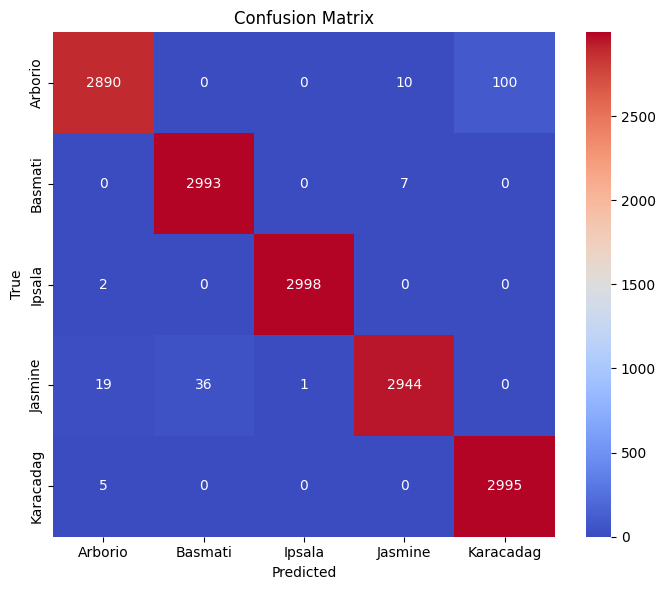

In [17]:
pred_probs = model.predict(val_gen)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = val_gen.classes
conf_matrix = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=list(train_gen.class_indices.keys()),
            yticklabels=list(train_gen.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
